In [1]:
!python tests.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.006s

OK


### 3.3 Метод Ньютона: постоянный шаг vs линейный поиск (2 балла)

In [52]:
import methods
from methods import LBFGS, Newton, BFGS, LBFGS, LineSearchTool
import oracles
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt
import pickle
from sklearn import datasets
from numpy.linalg import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_iter_num(history):
    return len(history['func']) - 1


m = 32561, n = 123
a9a.txt


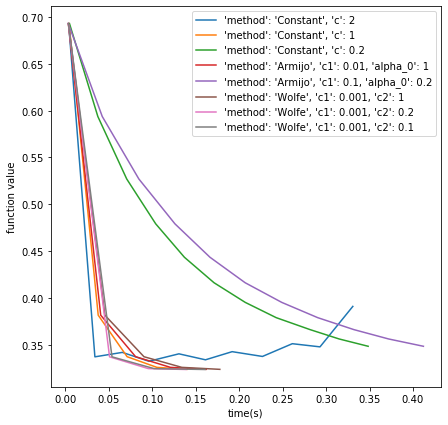

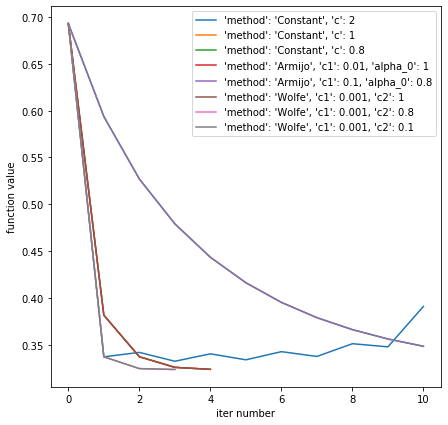

m = 6000, n = 5000
gisette_scale


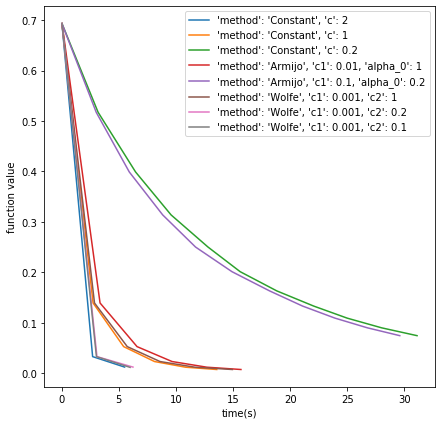

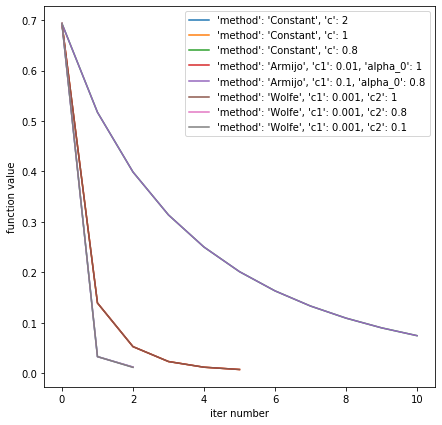

m = 72309, n = 20958
real-sim


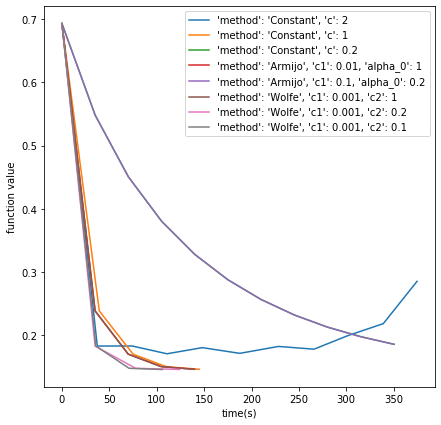

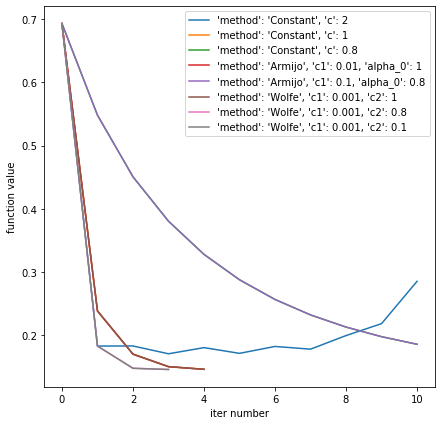

In [31]:
for data in ['a9a.txt','gisette_scale','real-sim']:
    dataset = datasets.load_svmlight_file(f"data/{data}")
    if data == 'real-sim':
        A = dataset[0]
    else:
        A = dataset[0].toarray()
    b = dataset[1]
    m = A.shape[0]
    n = A.shape[1]
    print(f"m = {m}, n = {n}")
    x0 = np.zeros(n) 
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    histories=[]
    plt.figure(figsize=(7,7))
    print(data)
    for optParamDict  in [{'method': 'Constant','c' : 2},
                          {'method': 'Constant','c' : 1},
                          {'method': 'Constant','c' : 0.2},
                          {'method': 'Armijo','c1':1e-2,'alpha_0':1},
                          {'method': 'Armijo','c1':0.1,'alpha_0':0.2},
                          {'method': 'Wolfe','c1':1e-3,'c2':1},
                          {'method': 'Wolfe','c1':1e-3,'c2':0.2},
                          {'method': 'Wolfe','c1':1e-3,'c2':0.1}]:
        params = methods.get_line_search_tool(optParamDict)
        _,_, history = Newton(oracle,x0,line_search_options=params).run(10)
        histories.append(history)
        gd_iter = get_iter_num(history)
        plt.plot(history['time'], history['func'], label="{}".format(str(optParamDict)[1:-1]))
        plt.legend(loc='best')
        plt.xlabel("time(s)")
        plt.ylabel("function value")
    plt.show()
    plt.figure(figsize=(7,7))
    for hist,optParamDict in zip(histories,[{'method': 'Constant','c' : 2},
                          {'method': 'Constant','c' : 1},
                          {'method': 'Constant','c' : 0.2},
                          {'method': 'Armijo','c1':1e-2,'alpha_0':1},
                          {'method': 'Armijo','c1':0.1,'alpha_0':0.2},
                          {'method': 'Wolfe','c1':1e-3,'c2':1},
                          {'method': 'Wolfe','c1':1e-3,'c2':0.2},
                          {'method': 'Wolfe','c1':1e-3,'c2':0.1}]):   
        plt.plot(hist['func'], label="{}".format(str(optParamDict)[1:-1]))
        plt.legend(loc='best')
        plt.xlabel("iter number")
        plt.ylabel("function value")
    plt.show()

К сожалению, проблему так и не удалось решить. Ну, можно сделать выводы, что, например, при константном методе $c=2$ алгоритм не сходится. Можно затестить, что происходит при таких значениях с другими методами.

m = 32561, n = 123
a9a.txt


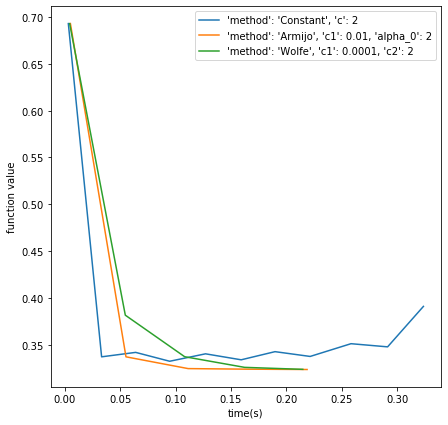

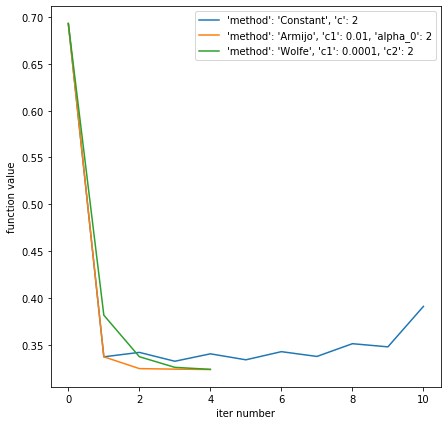

In [40]:
for data in ['a9a.txt']:
    dataset = datasets.load_svmlight_file(f"data/{data}")
    if data == 'real-sim':
        A = dataset[0]
    else:
        A = dataset[0].toarray()
    b = dataset[1]
    m = A.shape[0]
    n = A.shape[1]
    print(f"m = {m}, n = {n}")
    x0 = np.zeros(n) 
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    histories=[]
    plt.figure(figsize=(7,7))
    print(data)
    for optParamDict  in [{'method': 'Constant','c' : 2},
                          {'method': 'Armijo','c1':1e-2,'alpha_0':2},
                          {'method': 'Wolfe','c1':1e-4,'c2':2}]:
        params = methods.get_line_search_tool(optParamDict)
        _,_, history = Newton(oracle,x0,line_search_options=params).run(10)
        histories.append(history)
        gd_iter = get_iter_num(history)
        plt.plot(history['time'], history['func'], label="{}".format(str(optParamDict)[1:-1]))
        plt.legend(loc='best')
        plt.xlabel("time(s)")
        plt.ylabel("function value")
    plt.show()
    plt.figure(figsize=(7,7))
    for hist,optParamDict in zip(histories,[{'method': 'Constant','c' : 2},
                          {'method': 'Armijo','c1':1e-2,'alpha_0':2},
                          {'method': 'Wolfe','c1':1e-4,'c2':2}]):   
        plt.plot(hist['func'], label="{}".format(str(optParamDict)[1:-1]))
        plt.legend(loc='best')
        plt.xlabel("iter number")
        plt.ylabel("function value")
    plt.show()
    

Ну, хотя бы так... Адаптивные стратегии победили.

### 3.4 L-BFGS: зависимость от размера истории

a9a.txt
Size = 1, time~0.8711531162261963
Size = 2, time~0.9270968437194824
Size = 5, time~0.4984138011932373
Size = 10, time~0.4127078056335449
Size = 15, time~0.38208675384521484
Size = 20, time~0.38619112968444824
Size = 50, time~0.3868999481201172
Size = 100, time~0.3792722225189209
Size = 200, time~0.3856511116027832


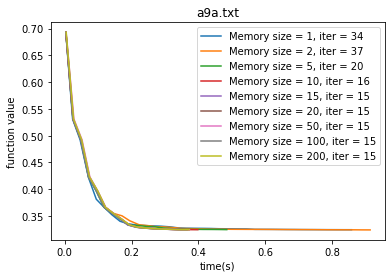

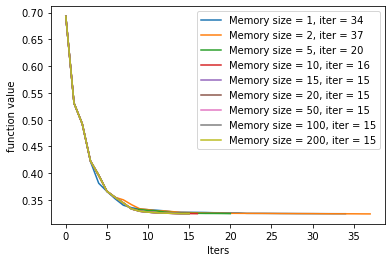

gisette_scale
Size = 1, time~14.484036207199097
Size = 2, time~13.411487102508545
Size = 5, time~7.341636896133423
Size = 10, time~7.034537076950073
Size = 15, time~6.161402940750122
Size = 20, time~7.57573390007019
Size = 50, time~6.1686179637908936
Size = 100, time~6.332090139389038
Size = 200, time~6.393583059310913


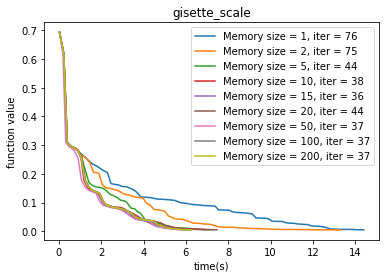

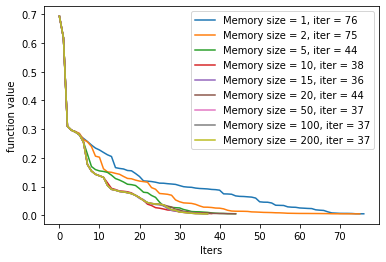

real-sim
Size = 1, time~0.9867968559265137
Size = 2, time~1.0378491878509521
Size = 5, time~0.9728107452392578
Size = 10, time~0.872852087020874
Size = 15, time~0.9223799705505371
Size = 20, time~0.8712170124053955
Size = 50, time~0.8833239078521729
Size = 100, time~0.8483281135559082
Size = 200, time~0.8626670837402344


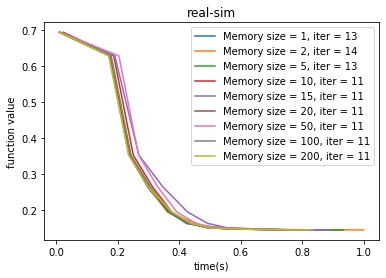

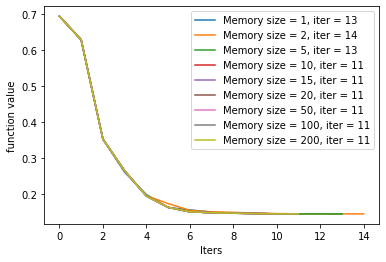

In [44]:
for data in ['a9a.txt','gisette_scale','real-sim']:
    dataset = datasets.load_svmlight_file(f"data/{data}")
    if data == 'real-sim':
        A = dataset[0]
    else:
        A = dataset[0].toarray()
    b = dataset[1]
    m = A.shape[0]
    n = A.shape[1]
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)  
    res ={}
    sizes = [1,2,5,10,15,20,50,100,200]
    tol = 1e-5
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    x0 = np.zeros(n)
    print(data)
    for m_size in sizes:     
        st_time = time.time()
        _,_,res[m_size] = LBFGS(oracle, x0, tolerance=tol, memory_size=m_size).run(100)
        print(f"Size = {m_size}, time~{time.time() - st_time}")
    #plt.figure(figsize=(6,6))
    for m_size, history in res.items():
        iterations = get_iter_num(history)
        plt.plot(history['time'], history['func'], label="Memory size = {}, iter = {}".format(m_size, iterations))        
        plt.legend(loc='best')
        plt.xlabel("time(s)")
        plt.ylabel("function value")
    plt.title(data)    
    plt.show()
    #plt.figure(figsize=(6,6))
    for m_size, history in res.items():
        iterations = get_iter_num(history)
        plt.plot( history['func'], label="Memory size = {}, iter = {}".format(m_size, iterations))        
        plt.legend(loc='best')
        plt.xlabel("Iters")
        plt.ylabel("function value")
    plt.show()

По результатам эксперимента напрашивается вывод, что профитнее использовать больший размер истории,так как это ведет к ускорению работы ао. Можно заметить, что после определенного значения размера истории качество работы алгоритма особо сильно не изменялось, поэтому и увеличивать далее этот параметр не имеет смысла. Для датасетов a9a и gisette_scale значение $l = 15$ оказалось достаточным, чтобы решить задачу за небольшее количество итераци, чем при других значениях $l$. Для real-sim похожее поведение наблюдалось при $l=10$. 

### 3.5 Сравнение методов

In [60]:
from methods3 import GradientDescent

a9a.txt
Method = <class 'methods3.GradientDescent'>, time~1.4233667850494385
Method = <class 'methods.Newton'>, time~0.2136859893798828
Method = <class 'methods.LBFGS'>, time~0.3172752857208252


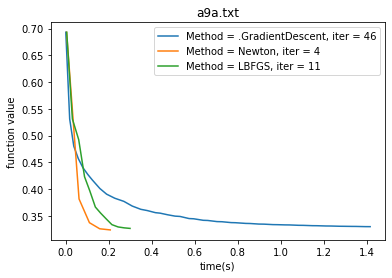

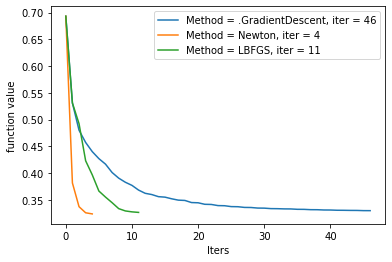

gisette_scale
Method = <class 'methods3.GradientDescent'>, time~11.136399984359741
Method = <class 'methods.Newton'>, time~15.68416690826416
Method = <class 'methods.LBFGS'>, time~5.68679404258728


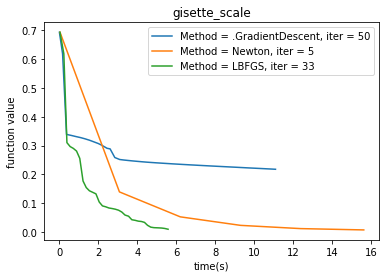

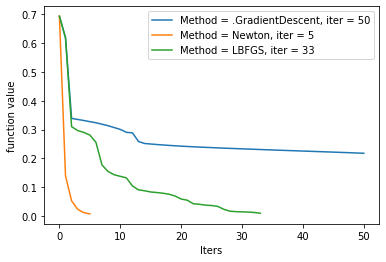

real-sim
Method = <class 'methods3.GradientDescent'>, time~10.543752908706665
Method = <class 'methods.Newton'>, time~158.55484318733215
Method = <class 'methods.LBFGS'>, time~0.7526569366455078


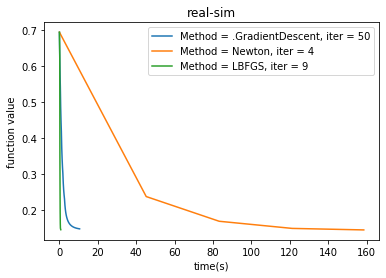

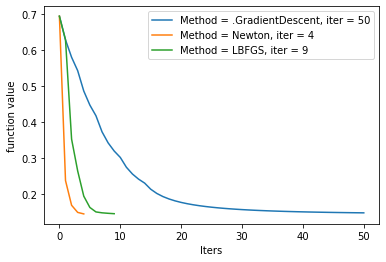

In [9]:
for data in ['a9a.txt','gisette_scale','real-sim']:
    dataset = datasets.load_svmlight_file(f"data/{data}")
    if data == 'real-sim':
        A = dataset[0]
    else:
        A = dataset[0].toarray()
    b = dataset[1]
    m = A.shape[0]
    n = A.shape[1]
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)  
    res ={}
    methods = [GradientDescent,Newton,LBFGS]
    tol = 1e-4
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    x0 = np.zeros(n)
    print(data)
    for method in methods:     
        st_time = time.time()
        if method == LBFGS:
            res[str(method)[16:-2]] = method(oracle, x0, tolerance=tol,memory_size=15).run(50)[-1]
        else:       
            res[str(method)[16:-2]] = method(oracle, x0, tolerance=tol).run(50)[-1]
        print(f"Method = {method}, time~{time.time() - st_time}")
    #plt.figure(figsize=(6,6))
    for i, history in res.items():
        iterations = get_iter_num(history)
        plt.plot(history['time'], history['func'], label="Method = {}, iter = {}".format(i, iterations))        
        plt.legend(loc='best')
        plt.xlabel("time(s)")
        plt.ylabel("function value")
    plt.title(data)    
    plt.show()
    #plt.figure(figsize=(6,6))
    for i, history in res.items():
        iterations = get_iter_num(history)
        plt.plot( history['func'], label="Method = {}, iter = {}".format(i, iterations))        
        plt.legend(loc='best')
        plt.xlabel("Iters")
        plt.ylabel("function value")
    plt.show()

Метод BFGS очень странно себя вел на датасетах, на первом датасете он отработал, хотя и с большим количеством итераций, чем другие. На втором датасете в какой-то момент, значение функции перестало изменяться, видимо, дело в каких-то моментах, связанных с расчетами, хотя я пытался избежать проблемых случаев при вычислениях. Никаких ошибок не появлялось (отключение сообщений об ошибках в ноутбуке я добавил после всех экспериментов).

a9a.txt
Method = <class 'methods.BFGS'>, time~0.4970710277557373


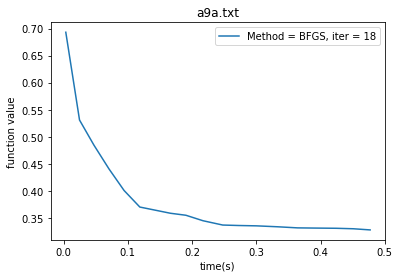

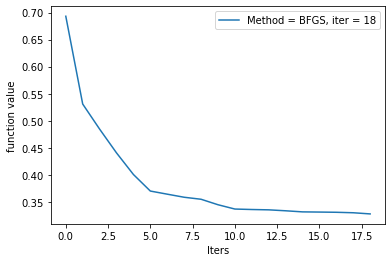

gisette_scale
Method = <class 'methods.BFGS'>, time~144.6219391822815


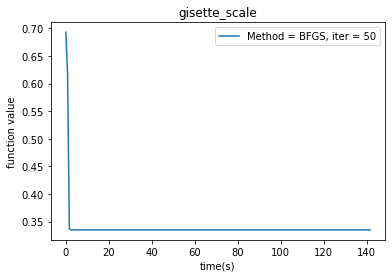

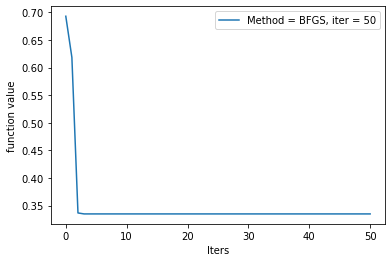

In [12]:
for data in ['a9a.txt','gisette_scale']:
    dataset = datasets.load_svmlight_file(f"data/{data}")
    if data == 'real-sim':
        A = dataset[0]
    else:
        A = dataset[0].toarray()
    b = dataset[1]
    m = A.shape[0]
    n = A.shape[1]
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)  
    res ={}
    methods = [BFGS]
    tol = 1e-4
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    x0 = np.zeros(n)
    print(data)
    for method in methods:     
        st_time = time.time()
        if method == LBFGS:
            res[str(method)[16:-2]] = method(oracle, x0, tolerance=tol,memory_size=15).run(50)[-1]
        else:       
            res[str(method)[16:-2]] = method(oracle, x0, tolerance=tol).run(50)[-1]
        print(f"Method = {method}, time~{time.time() - st_time}")
    #plt.figure(figsize=(6,6))
    for i, history in res.items():
        iterations = get_iter_num(history)
        plt.plot(history['time'], history['func'], label="Method = {}, iter = {}".format(i, iterations))        
        plt.legend(loc='best')
        plt.xlabel("time(s)")
        plt.ylabel("function value")
    plt.title(data)    
    plt.show()
    #plt.figure(figsize=(6,6))
    for i, history in res.items():
        iterations = get_iter_num(history)
        plt.plot( history['func'], label="Method = {}, iter = {}".format(i, iterations))        
        plt.legend(loc='best')
        plt.xlabel("Iters")
        plt.ylabel("function value")
    plt.show()

Можно сделать следующие выводы:
1. Методы Newton и L-BFGS сходятся быстрее как по итерация, так и по времени. Ситуация с real-sim будет прокомментирована далее.
2. На всех датасетах метод Ньютона сходится быстрее по итерациям, но не по времени. По реальному времени L-BFGS оказывается быстрее, кроме первого сета. Можно объяснить подобное поведение дороговизной калькуляций первого метода по сравнению с последним. Более того, в ситуации, когда размерность задачи оказывается высокой, актуальность использования данного метода падает(в случае с real-sim даже по сравнению с GD).

P.S. Думаю, что в данных задачах большую роль при рассчетах играет ситуация с форматом данных и т.д. Мне удалось нормально работать со вторым датасетом только изменив формат данных. Возможно, эти действия отрицательно сказываются на вычислениях в алгоритмах. Но это, скорее, предположение.
И, как уже упомянул ранее в диалоге, возможно, стоит в тестах чекать поведение написанных методов на каких-то подобиях данных, которые будут использоваться в задании и на недефолтных значениях, например, каких-то констант. Просто в какой-то момент не понимаешь, то ли что-то заруинил сам, то ли все ок, просто так и должно быть. Если, вдруг, за работу оценка будет выходить оценка ниже 5,6 баллов - дайте знать, если можно еще что-то дополнить/пофиксить, чтобы хватило баллов на автомат... Обновленные графики ниже. Спасибо!

### 3.2 (Бонус) Точные решения

m = 32561, n = 123
Grad(x0) squared =  0.4539661151672872
a9a.txt
Dataset - a9a.txt, time~10.339438199996948
Grad norm squared = 9.95201799698977e-17


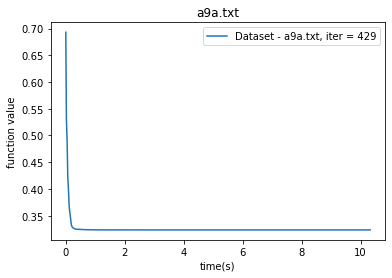

m = 6000, n = 5000
Grad(x0) squared =  6.533590402357585
gisette_scale
Dataset - gisette_scale, time~68.91648507118225
Grad norm squared = 4.794255735411519e-17


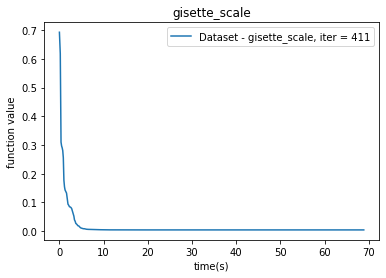

m = 72309, n = 20958
Grad(x0) squared =  0.0011027404677374448
real-sim
Dataset - real-sim, time~2.270328998565674
Grad norm squared = 9.663474968198004e-17


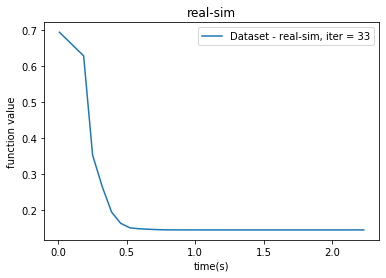

In [35]:
all_hists = []
for data in ['a9a.txt','gisette_scale','real-sim']:
    dataset = datasets.load_svmlight_file(f"data/{data}")
    if data == 'real-sim':
        A = dataset[0]
    else:
        A = dataset[0].toarray()
    b = dataset[1]
    m = A.shape[0]
    n = A.shape[1]
    print(f"m = {m}, n = {n}")
    x0 = np.zeros(n) 
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    start_grad_norm = norm(oracle.grad(x0))**2
    print('Grad(x0) squared = ',start_grad_norm)
    res ={}
    methods = [LBFGS]
    tol = 1e-16 / start_grad_norm
    print(data)
    for method in methods:     
        st_time = time.time()
        if method == LBFGS:
            res[str(data)] = method(oracle, x0, tolerance=tol,memory_size=10).run(10000)[-1]
        else:       
            res[str(data)] = method(oracle, x0, tolerance=tol).run(50)[-1]
        print(f"Dataset - {data}, time~{time.time() - st_time}")
        print("Grad norm squared = {}".format(norm(res[data]['grad_norm'][-1])**2))
    all_hists.append(res)
    #plt.figure(figsize=(6,6))
    for i, history in res.items():
        iterations = get_iter_num(history)
        plt.plot(history['time'], history['func'], label="Dataset - {}, iter = {}".format(i, iterations))        
        plt.legend(loc='best')
        plt.xlabel("time(s)")
        plt.ylabel("function value")
    plt.title(data)    
    plt.show()

In [49]:
for i,data in zip(range(3),['a9a.txt','gisette_scale','real-sim']):
    print('Dataset - {}, f_star = {}'.format(data,all_hists[i][data]['func'][-1]))

Dataset - a9a.txt, f_star = 0.3233795824648849
Dataset - gisette_scale, f_star = 0.003865338037194686
Dataset - real-sim, f_star = 0.14519850119873562


### 3.3 rmk

m = 32561, n = 123
a9a.txt


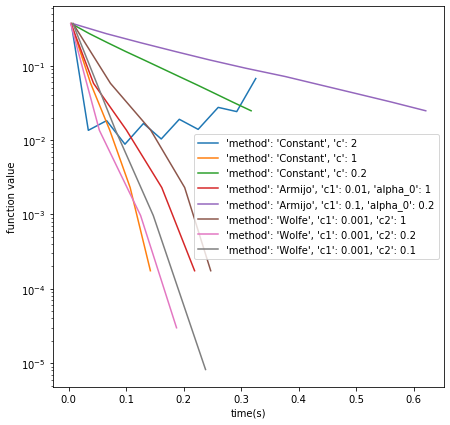

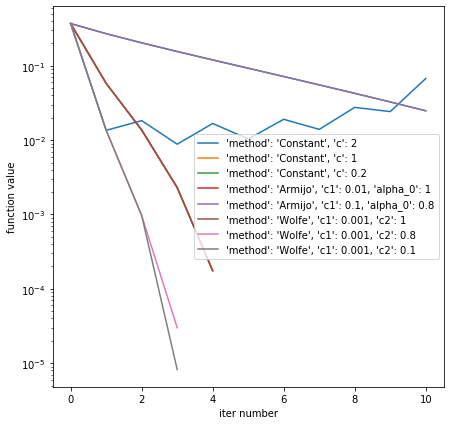

m = 6000, n = 5000
gisette_scale


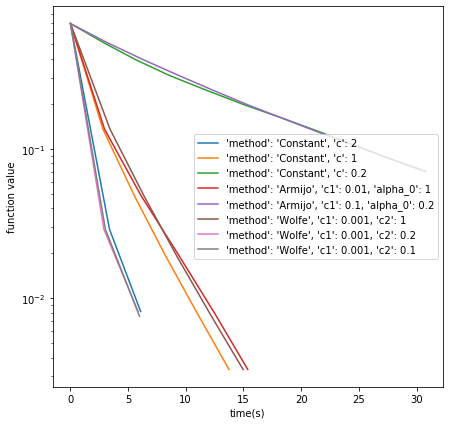

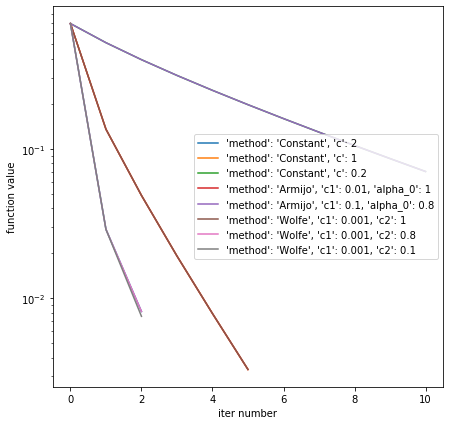

m = 72309, n = 20958
real-sim


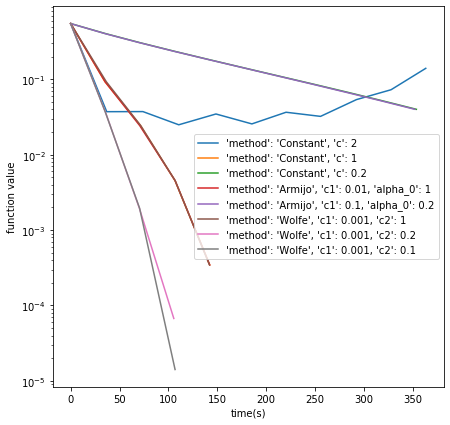

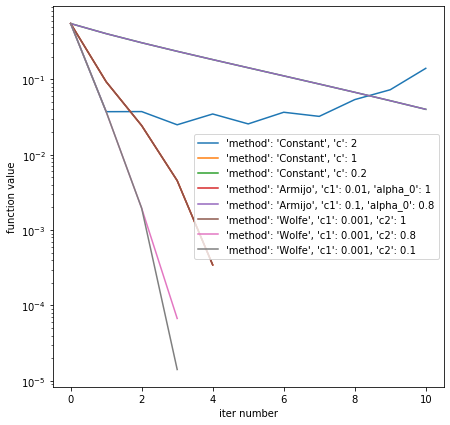

In [54]:
for j,data in zip(range(3),['a9a.txt','gisette_scale','real-sim']):
    dataset = datasets.load_svmlight_file(f"data/{data}")
    if data == 'real-sim':
        A = dataset[0]
    else:
        A = dataset[0].toarray()
    b = dataset[1]
    m = A.shape[0]
    n = A.shape[1]
    print(f"m = {m}, n = {n}")
    x0 = np.zeros(n) 
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    histories=[]
    plt.figure(figsize=(7,7))
    print(data)
    f_star = all_hists[j][data]['func'][-1]
    for optParamDict  in [{'method': 'Constant','c' : 2},
                          {'method': 'Constant','c' : 1},
                          {'method': 'Constant','c' : 0.2},
                          {'method': 'Armijo','c1':1e-2,'alpha_0':1},
                          {'method': 'Armijo','c1':0.1,'alpha_0':0.2},
                          {'method': 'Wolfe','c1':1e-3,'c2':1},
                          {'method': 'Wolfe','c1':1e-3,'c2':0.2},
                          {'method': 'Wolfe','c1':1e-3,'c2':0.1}]:
        params = methods.get_line_search_tool(optParamDict)
        _,_, history = Newton(oracle,x0,line_search_options=params).run(10)
        histories.append(history)
        gd_iter = get_iter_num(history)
        plt.plot(history['time'], history['func']-f_star, label="{}".format(str(optParamDict)[1:-1]))
        plt.yscale('log')
        plt.legend(loc='best')
        plt.xlabel("time(s)")
        plt.ylabel("function value")
    plt.show()
    plt.figure(figsize=(7,7))
    for hist,optParamDict in zip(histories,[{'method': 'Constant','c' : 2},
                          {'method': 'Constant','c' : 1},
                          {'method': 'Constant','c' : 0.2},
                          {'method': 'Armijo','c1':1e-2,'alpha_0':1},
                          {'method': 'Armijo','c1':0.1,'alpha_0':0.2},
                          {'method': 'Wolfe','c1':1e-3,'c2':1},
                          {'method': 'Wolfe','c1':1e-3,'c2':0.2},
                          {'method': 'Wolfe','c1':1e-3,'c2':0.1}]):   
        plt.plot(hist['func']-f_star, label="{}".format(str(optParamDict)[1:-1]))
        plt.yscale('log')
        plt.legend(loc='best')
        plt.xlabel("iter number")
        plt.ylabel("function value")
    plt.show()

### 3.4 rmk

a9a.txt
Size = 1, time~0.921658992767334
Size = 2, time~1.0444989204406738
Size = 5, time~0.5142550468444824
Size = 10, time~0.4228811264038086
Size = 15, time~0.3970518112182617
Size = 20, time~0.40123510360717773
Size = 50, time~0.39100193977355957
Size = 100, time~0.39868974685668945
Size = 200, time~0.41564178466796875


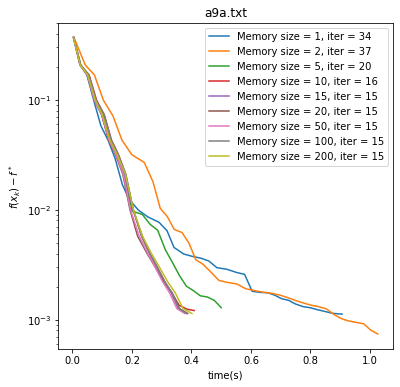

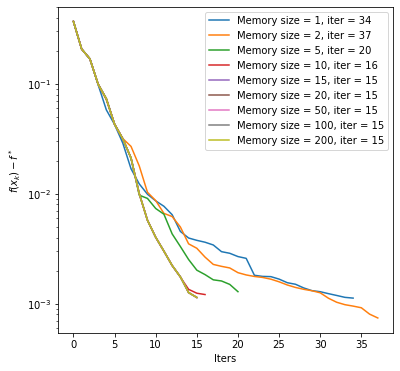

gisette_scale
Size = 1, time~14.227224111557007
Size = 2, time~12.981933832168579
Size = 5, time~7.367402076721191
Size = 10, time~6.6858460903167725
Size = 15, time~6.281379222869873
Size = 20, time~7.235713958740234
Size = 50, time~6.293863296508789
Size = 100, time~5.9894020557403564
Size = 200, time~6.373712062835693


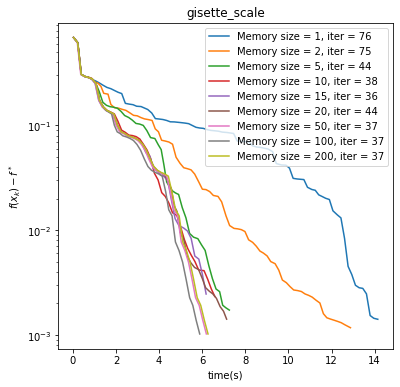

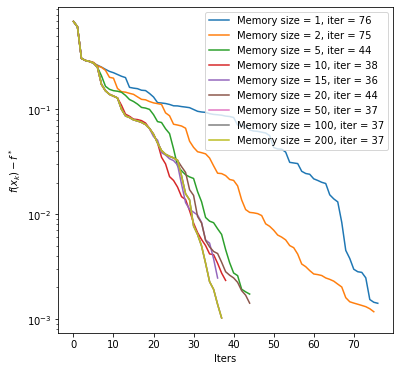

real-sim
Size = 1, time~0.987185001373291
Size = 2, time~1.076150894165039
Size = 5, time~0.9621398448944092
Size = 10, time~0.8608481884002686
Size = 15, time~0.8416211605072021
Size = 20, time~0.8409349918365479
Size = 50, time~0.8393118381500244
Size = 100, time~0.83803391456604
Size = 200, time~0.8381011486053467


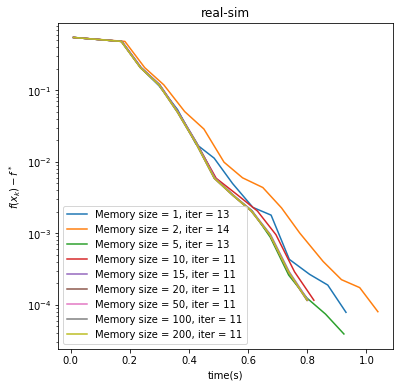

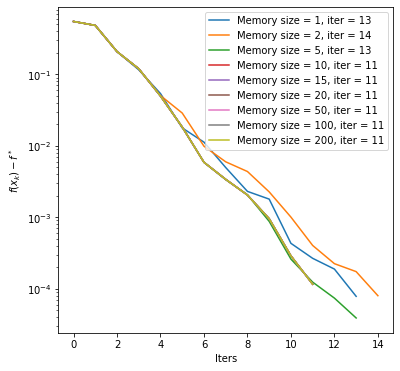

In [58]:
for j,data in zip(range(3),['a9a.txt','gisette_scale','real-sim']):
    dataset = datasets.load_svmlight_file(f"data/{data}")
    if data == 'real-sim':
        A = dataset[0]
    else:
        A = dataset[0].toarray()
    b = dataset[1]
    m = A.shape[0]
    n = A.shape[1]
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)  
    res ={}
    sizes = [1,2,5,10,15,20,50,100,200]
    tol = 1e-5
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    x0 = np.zeros(n)
    print(data)
    f_star = all_hists[j][data]['func'][-1]
    for m_size in sizes:     
        st_time = time.time()
        _,_,res[m_size] = LBFGS(oracle, x0, tolerance=tol, memory_size=m_size).run(100)
        print(f"Size = {m_size}, time~{time.time() - st_time}")
    plt.figure(figsize=(6,6))
    for m_size, history in res.items():
        iterations = get_iter_num(history)
        plt.plot(history['time'], history['func']-f_star, label="Memory size = {}, iter = {}".format(m_size, iterations))        
        plt.yscale('log')
        plt.legend(loc='best')
        plt.xlabel("time(s)")
        plt.ylabel("$f(x_k)-f^*$")
    plt.title(data)    
    plt.show()
    plt.figure(figsize=(6,6))
    for m_size, history in res.items():
        iterations = get_iter_num(history)
        plt.plot( history['func']-f_star, label="Memory size = {}, iter = {}".format(m_size, iterations))
        plt.yscale('log')
        plt.legend(loc='best')
        plt.xlabel("Iters")
        plt.ylabel("$f(x_k)-f^*$")
    plt.show()

### 3.5 rmk

a9a.txt
Method = <class 'methods3.GradientDescent'>, time~1.320680856704712
Method = <class 'methods.Newton'>, time~0.18343687057495117
Method = <class 'methods.LBFGS'>, time~0.28389501571655273


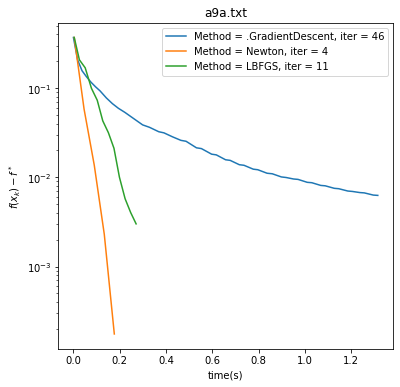

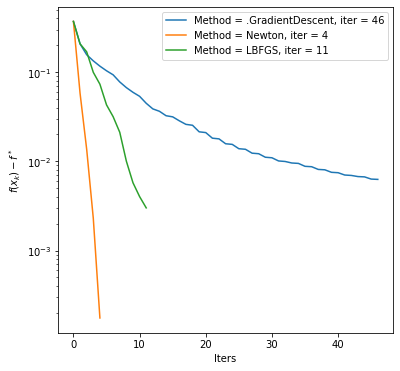

gisette_scale
Method = <class 'methods3.GradientDescent'>, time~11.224915266036987
Method = <class 'methods.Newton'>, time~14.28610110282898
Method = <class 'methods.LBFGS'>, time~5.539520025253296


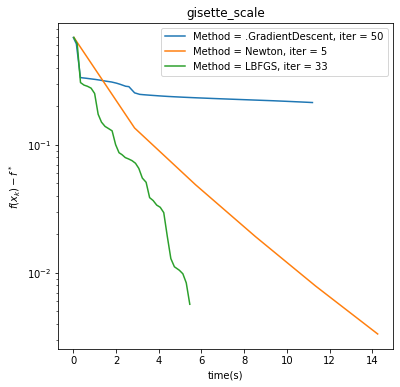

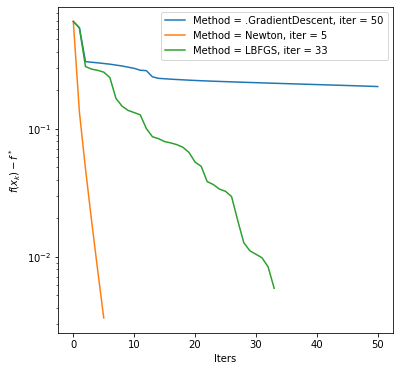

real-sim
Method = <class 'methods3.GradientDescent'>, time~10.378998041152954
Method = <class 'methods.Newton'>, time~143.81814789772034
Method = <class 'methods.LBFGS'>, time~0.7294530868530273


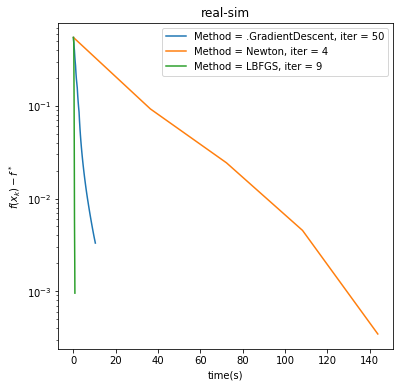

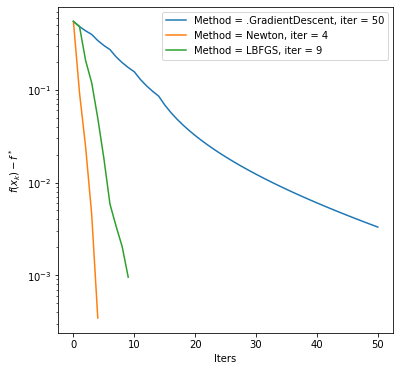

In [61]:
for j,data in zip(range(3),['a9a.txt','gisette_scale','real-sim']):
    dataset = datasets.load_svmlight_file(f"data/{data}")
    if data == 'real-sim':
        A = dataset[0]
    else:
        A = dataset[0].toarray()
    b = dataset[1]
    m = A.shape[0]
    n = A.shape[1]
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)  
    res ={}
    methods = [GradientDescent,Newton,LBFGS]
    tol = 1e-4
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    x0 = np.zeros(n)
    print(data)
    f_star = all_hists[j][data]['func'][-1]
    for method in methods:     
        st_time = time.time()
        if method == LBFGS:
            res[str(method)[16:-2]] = method(oracle, x0, tolerance=tol,memory_size=15).run(50)[-1]
        else:       
            res[str(method)[16:-2]] = method(oracle, x0, tolerance=tol).run(50)[-1]
        print(f"Method = {method}, time~{time.time() - st_time}")
    plt.figure(figsize=(6,6))
    for i, history in res.items():
        iterations = get_iter_num(history)
        plt.plot(history['time'], history['func']-f_star, label="Method = {}, iter = {}".format(i, iterations))
        plt.yscale('log')
        plt.legend(loc='best')
        plt.xlabel("time(s)")
        plt.ylabel("$f(x_k)-f^*$")
    plt.title(data)    
    plt.show()
    plt.figure(figsize=(6,6))
    for i, history in res.items():
        iterations = get_iter_num(history)
        plt.plot( history['func']-f_star, label="Method = {}, iter = {}".format(i, iterations))
        plt.yscale('log')
        plt.legend(loc='best')
        plt.xlabel("Iters")
        plt.ylabel("$f(x_k)-f^*$")
    plt.show()